<a href="https://colab.research.google.com/github/Lkyanamaisamari/Django/blob/main/Image_classification_(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Import dependencies*

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

*Load the Fashion-MNIST*

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


*Normalize pixel values to be between 0 and 1*

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

*Reshape the data to add a channel dimension*

In [7]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

*Define the model*

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

*Compile the model*

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

*Train the model*

In [10]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.5045 - accuracy: 0.8133 - val_loss: 0.4038 - val_accuracy: 0.8516
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3266 - accuracy: 0.8804 - val_loss: 0.3251 - val_accuracy: 0.8833
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2784 - accuracy: 0.8977 - val_loss: 0.2905 - val_accuracy: 0.8965
Epoch 4/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2501 - accuracy: 0.9072 - val_loss: 0.2941 - val_accuracy: 0.8927
Epoch 5/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2249 - accuracy: 0.9159 - val_loss: 0.2721 - val_accuracy: 0.9036


*Evaluate the model*

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 3s - loss: 0.2721 - accuracy: 0.9036 - 3s/epoch - 10ms/step
Test accuracy: 0.9035999774932861


*Visualize training history*

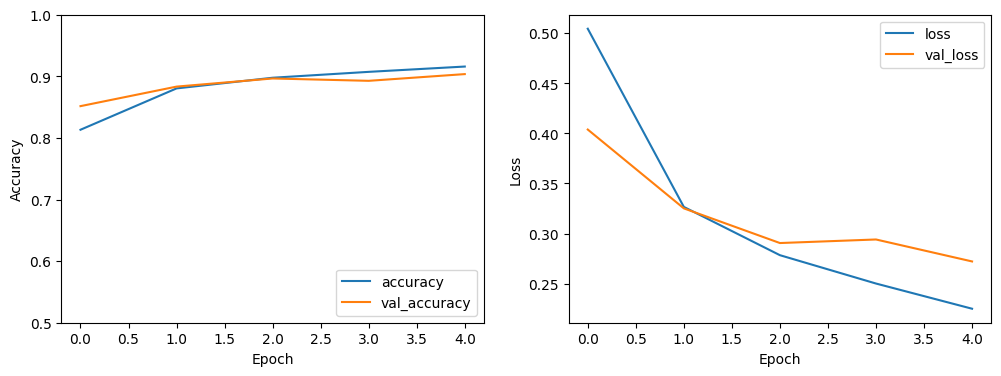

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

*Select a few random test images*

In [50]:
num_images = 10
indices = np.random.choice(len(test_images), num_images)
sample_test_images = test_images[indices]
sample_test_labels = test_labels[indices]

*Make predictions*

In [51]:
predictions = model.predict(sample_test_images)

1/1 [==============================] - 0s 26ms/step


*Display the test images along with predicted and true labels*

In [52]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

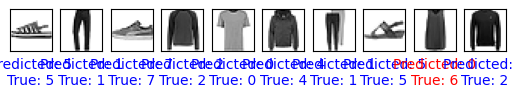

In [53]:
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = sample_test_labels[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
plt.show()

*Summary*